In [9]:
def ReLU(x):
    return np.where(x<0,0,x)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 1})
import scipy
import numpy as np
import matplotlib as mpl

import os, sys
currentdir = os.path.dirname(os.path.abspath(os.getcwd()))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, currentdir) 

cmap = 'coolwarm'

from matplotlib.ticker import MaxNLocator
from mpl_toolkits import mplot3d

scale = 50
vmin = -6
vmax = 1

%matplotlib inline

ValueError: operands could not be broadcast together with shapes (3,3) (2,2) (3,3) 

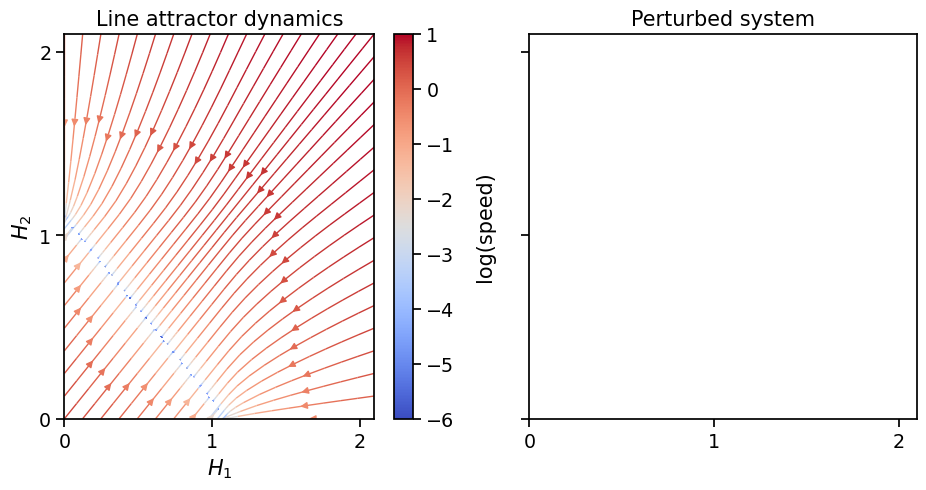

In [11]:
W_hh = np.array([[.0,-1,-1],[-1,0,-1],[-1,-1,0]])
b = np.array([1.,1.,1.])

w = 2.1
Y, X = np.mgrid[0:w:100j, 0:w:100j]
U = ReLU(W_hh[0,0]*X + W_hh[0,1]*Y + b[0]) - X
V = ReLU(W_hh[1,0]*X + W_hh[1,1]*Y + b[1]) - Y
W = ReLU(W_hh[2,0]*X + W_hh[2,1]*Y + b[2]) - Z
speed = np.log(np.sqrt(U**2 + V**2, W**2))

fig, axs = plt.subplots(1, 2, figsize=(11, 5), sharex=True, sharey=True)
axs = axs.flat
# Line attractor dynamics
axs[0].set_title('Line attractor dynamics')
normi = mpl.colors.Normalize(vmin=-6, vmax=1)
strm = axs[0].streamplot(X, Y, U, V, density=.6, broken_streamlines=False, color=speed, cmap=cmap, norm=normi)
cbar = fig.colorbar(strm.lines)
cbar.ax.set_ylabel('log(speed)', rotation=90, labelpad=15)
axs[0].set(xlim=(0, w), ylim=(0, w))
axs[0].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[0].yaxis.set_major_locator(MaxNLocator(integer=True))
axs[0].set_xlabel("$H_1$")
axs[0].set_ylabel("$H_2$")

# Perturbed dynamics
axs[1].set_title('Perturbed system')
W_hh += np.random.normal(.1, .1, (2,2))
Wx = np.array([[-1.,0],[0,-1]])
b += np.random.normal(0, 0.01, (2))

U = ReLU(W_hh[0,0]*X + W_hh[0,1]*Y + b[0]) - X
V = ReLU(W_hh[1,0]*X + W_hh[1,1]*Y + b[1]) - Y
speed = np.log(np.sqrt(U**2 + V**2))

normi = mpl.colors.Normalize(vmin=-6, vmax=1)
strm = axs[1].streamplot(X, Y, U, V, density=.6, broken_streamlines=False, color=speed, cmap=cmap, norm=normi)
cbar = fig.colorbar(strm.lines)
cbar.ax.set_ylabel('log(speed)', rotation=90, labelpad=15)

# axs[1].plot(fixed_point[0], fixed_point[1], 'bo')
seed_points = np.array([[0.0, 0.001], [0.2, 1.1]])
# axs[1].streamplot(X, Y, U, V, color='crimson', linewidth=2, start_points=seed_points, integration_direction='forward', density=1, broken_streamlines=False)
axs[1].set_xlabel("$H_1$")

plt.tight_layout()
# plt.savefig(currentdir+"/PoissonClicks/figs/lineattractor.pdf")
plt.show()

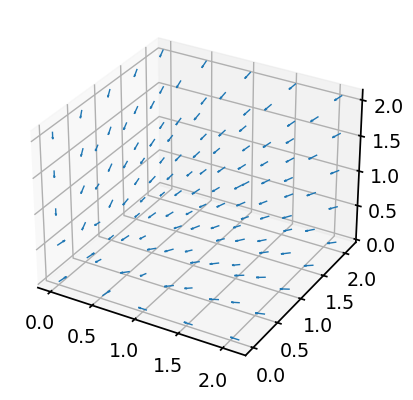

In [19]:
ax = plt.figure().add_subplot(projection='3d')
W_hh = np.array([[.0,-1,-1],[-1,0,-1],[-1,-1,0]])
b = np.array([1.,1.,1.])

# Make the grid
N = 5j
Z, Y, X = np.mgrid[0:w:N, 0:w:N, 0:w:N]
U = ReLU(W_hh[0,0]*X + W_hh[0,1]*Y + W_hh[0,2]*Z + b[0]) - X
V = ReLU(W_hh[1,0]*X + W_hh[1,1]*Y + W_hh[1,2]*Z + b[1]) - Y
W = ReLU(W_hh[2,0]*X + W_hh[2,1]*Y + W_hh[2,2]*Z + b[2]) - Z
speed = np.log(np.sqrt(U**2 + V**2 + W**2))

ax.quiver(X, Y, Z, U, V, W, length=0.1, normalize=True)

plt.show()

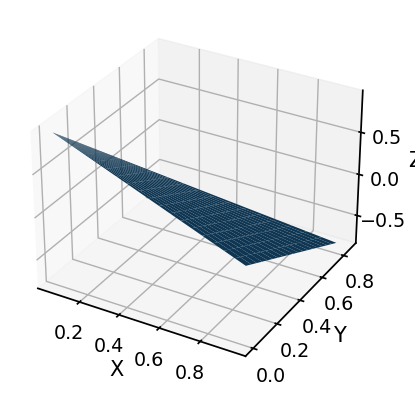

In [49]:
def fun(x, y):
    return 1 - x - y

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
grid_step = 0.05
x = np.arange(grid_step, 1.0, grid_step)
# y = 
# X, Y = np.meshgrid(x, y)
X = np.array([x for i in range(1, int(1/grid_step))])
Y = np.array([np.arange(0, xi, grid_step*xi) for xi in x])[:,:-1]
zs = np.array(fun(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [450]:
from scipy.integrate import odeint
def relu_ode(x,t,W,b):
    return ReLU(np.dot(W,x) + b) - x 

epsilon = 0.00
delta =   0.01
eta=      0.5
# W_hh = np.array([[epsilon,-1,-1],[-1,epsilon,-1],[-1,-1,epsilon]])
W_hh = np.array([[0,-1,-1],[-1,0,-1],[-1,-1,0]])
W_hh = np.array([[0,-1,-1],[-1,0,-1],[-1,-1,delta]])
# W_hh = np.array([[0,0,-1],[1,0,1],[-1,1,0]])
W_hh = np.array([[-1-delta,0,-1+delta],[-1+delta,0,-1-delta],[-1-delta,-1+delta,0]])
# W_hh = np.array([[0,-1-delta,-1+epsilon],[-1+epsilon,0,-1-delta],[-delta-1,-1+epsilon,0]]) #limit cycle for epsilon\geq0, delta>0

b = 2*np.array([1.,1.,1.])
maxT = 500
t = np.linspace(0, maxT, 2001)
# y0 = [0,2,.3]
# sol = odeint(relu_ode, y0=y0,  t=t, args=tuple([W_hh,b]))

In [451]:
Nrec = 3
max_grid = .2
step = .025
Ngrid = int(max_grid/step)
y0grid = np.mgrid[tuple(slice(0, max_grid, step) for _ in range(Nrec))].reshape((int((Ngrid)**Nrec), Nrec))

sols = []
# for y0 in y0grid:
#     sol = odeint(relu_ode, y0=y0,  t=t, args=tuple([W_hh,b]))
#     sols.append(sol)

y0grid = [[x, 1-x, 0.1] for x in np.arange(0, 1, step)]
for y0 in y0grid:
    sol = odeint(relu_ode, y0=y0,  t=t, args=tuple([W_hh,b]))
    sols.append(sol)

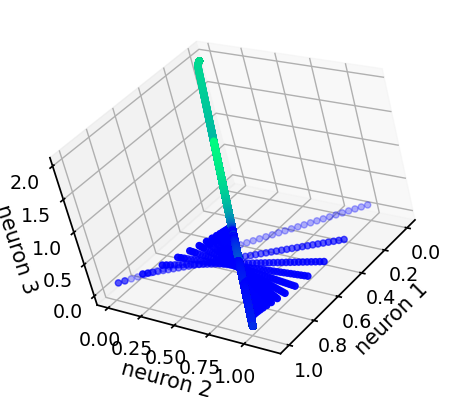

In [452]:
ax = plt.axes(projection='3d')
ax.view_init(elev=30, azim=45, roll=15)

for sol in sols:
    # ax.plot3D(sol[:, 0], sol[:, 1], sol[:, 2], color=plt.cm.jet(t/maxT))
    ax.scatter(sol[:, 0], sol[:, 1], sol[:, 2], color=plt.cm.winter(t/maxT))
    
ax.set_xlabel("neuron 1")
ax.set_ylabel("neuron 2")
ax.set_zlabel("neuron 3");

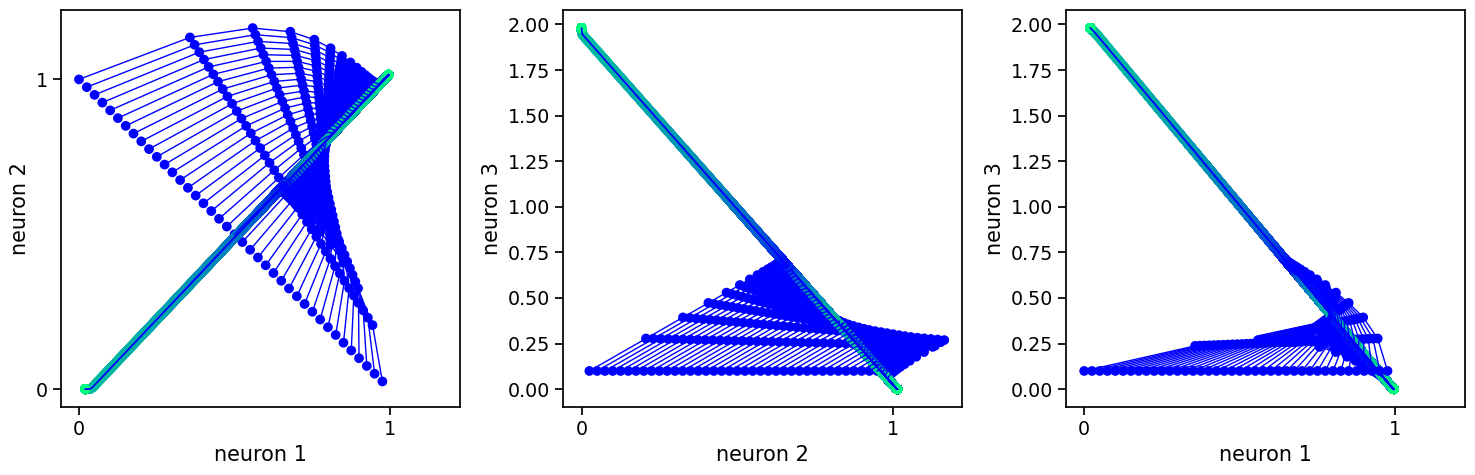

In [453]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=False)
axs = axs.flat
for sol in sols:
    axs[0].scatter(sol[:, 0], sol[:, 1], color=plt.cm.winter(t/maxT))
    axs[0].plot(sol[:, 0], sol[:, 1], 'b')
    axs[1].scatter(sol[:, 1], sol[:, 2], color=plt.cm.winter(t/maxT))
    axs[1].plot(sol[:, 1], sol[:, 2], 'b')
    axs[2].scatter(sol[:, 0], sol[:, 2], color=plt.cm.winter(t/maxT))
    axs[2].plot(sol[:, 0], sol[:, 2], 'b')
axs[0].xaxis.set_major_locator(MaxNLocator(integer=True))
axs[0].yaxis.set_major_locator(MaxNLocator(integer=True))
axs[0].set_xlabel("neuron 1")
axs[0].set_ylabel("neuron 2");
axs[1].set_xlabel("neuron 2")
axs[1].set_ylabel("neuron 3");
axs[2].set_xlabel("neuron 1")
axs[2].set_ylabel("neuron 3");
fig.tight_layout()

ValueError: If 'color' is given, it must match the shape of the (x, y) grid

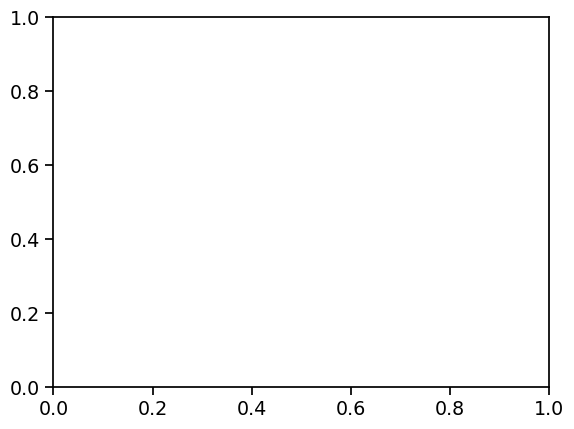

In [409]:
fig_tmp, ax_tmp = plt.subplots()
Y, X = np.mgrid[0:w:100j, 0:w:100j]

strm = axs[0].streamplot(X, Y, U, V, density=.6, broken_streamlines=False, color=speed, cmap=cmap, norm=normi)
lines = strm.lines.get_paths()# extract the lines from the temporary figure

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for line in lines:
    old_x = line.vertices.T[0]
    old_y = line.vertices.T[1]
    # apply for 2d to 3d transformation here
    new_z = np.exp(-(old_x ** 2 + old_y ** 2) / 4)
    new_x = 1 * old_x
    new_y = 1 * old_y
    ax.plot(new_x, new_y, new_z, 'k')